# Analyzing Image Classification Dataset

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb)

This notebook shows how you can use [fastdup](https://github.com/visual-layer/fastdup) to analyze an image classification dataset for:

+ Duplicates.
+ Outliers.
+ Wrong labels.
+ Image clusters.

If you're new, run the notebook in Google Colab or Kaggle for free.

> **Note** - No GPU needed! You can run on an instance with only CPU.



## Installation

First let's install [fastdup](https://github.com/visual-layer/fastdup) from PyPI with:

In [1]:
!pip install -Uqq fastdup

Now, test the installation. If there's no error message, we are ready to go.

In [2]:
import fastdup
fastdup.__version__

'0.930'

## Download Dataset

We will analyze the [Imagenette](https://github.com/fastai/imagenette) dataset - a subset of 10 easily classified classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).

In [3]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
!tar -xf imagenette2-160.tgz

--2023-05-16 08:53:02--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.251.158, 52.217.83.238, 52.217.96.150, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.251.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99003388 (94M) [application/x-tar]
Saving to: ‘imagenette2-160.tgz.1’

imagenette2-160.tgz 100%[===================>]  94.42M  46.0MB/s    in 2.1s    

2023-05-16 08:53:04 (46.0 MB/s) - ‘imagenette2-160.tgz.1’ saved [99003388/99003388]



## Load and Format Annotations

In [4]:
import pandas as pd

In [5]:
data_dir = 'imagenette2-160/'
csv_path = 'imagenette2-160/noisy_imagenette.csv'

In [6]:
label_map = {
    'n02979186': 'cassette_player', 
    'n03417042': 'garbage_truck', 
    'n01440764': 'tench', 
    'n02102040': 'English_springer', 
    'n03028079': 'church',
    'n03888257': 'parachute', 
    'n03394916': 'French_horn', 
    'n03000684': 'chain_saw', 
    'n03445777': 'golf_ball', 
    'n03425413': 'gas_pump'
}

Load the annotation provided with the dataset.

In [7]:
df_annot = pd.read_csv(csv_path)
df_annot.head(3)

path noisy_labels_0 noisy_labels_1 noisy_labels_5 noisy_labels_25 noisy_labels_50  is_valid
0   train/n02979186/n02979186_9036.JPEG      n02979186      n02979186      n02979186       n02979186       n02979186     False
1  train/n02979186/n02979186_11957.JPEG      n02979186      n02979186      n02979186       n02979186       n03000684     False
2   train/n02979186/n02979186_9715.JPEG      n02979186      n02979186      n02979186       n03417042       n03000684     False

Transform the annotation to fastdup supported format.

fastdup expects an annotation `DataFrame` that contains the following column:

+ filename - contains the path to the image file.
+ label - contains a label of the image.
+ split - whether the image is subset of the training, validation or test dataset.

In [8]:
# take relevant columns
df_annot = df_annot[['path', 'noisy_labels_0']]

# rename columns to fastdup's column names
df_annot = df_annot.rename({'noisy_labels_0': 'label', 'path': 'filename'}, axis='columns')

# append datadir
df_annot['filename'] = df_annot['filename'].apply(lambda x: data_dir + x)

# create split column
df_annot['split'] = df_annot['filename'].apply(lambda x: x.split("/")[1])

# map label ids to regular labels
df_annot['label'] = df_annot['label'].map(label_map)

# show formated annotations
df_annot

filename            label  split
0               imagenette2-160/train/n02979186/n02979186_9036.JPEG  cassette_player  train
1              imagenette2-160/train/n02979186/n02979186_11957.JPEG  cassette_player  train
2               imagenette2-160/train/n02979186/n02979186_9715.JPEG  cassette_player  train
3              imagenette2-160/train/n02979186/n02979186_21736.JPEG  cassette_player  train
4      imagenette2-160/train/n02979186/ILSVRC2012_val_00046953.JPEG  cassette_player  train
...                                                             ...              ...    ...
13389            imagenette2-160/val/n03425413/n03425413_17521.JPEG         gas_pump    val
13390            imagenette2-160/val/n03425413/n03425413_20711.JPEG         gas_pump    val
13391            imagenette2-160/val/n03425413/n03425413_19050.JPEG         gas_pump    val
13392            imagenette2-160/val/n03425413/n03425413_13831.JPEG         gas_pump    val
13393             imagenette2-160/val/n03425413/n03425413_1242.JPEG         gas_pump    val

[13394 rows x 3 columns]

## Run fastdup

With the images and annotations, we are now ready to run an analysis.

+ `work_dir` is the path to store the artifacts from the analysis.

+ `input_dir` is the path to the downloaded images.

In [9]:
work_dir = 'fastdup_imagenette'

fd = fastdup.create(work_dir=work_dir, input_dir=data_dir) 
fd.run(annotations=df_annot, ccthreshold=0.9, threshold=0.8)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-05-16 08:53:06 [INFO] Going to loop over dir imagenette2-160
2023-05-16 08:53:06 [INFO] Found total 13394 images to run on, 13394 train, 0 test, name list 13394, counter 13394 
2023-05-16 08:53:20 [INFO] Found total 13394 images to run onimated: 0 Minutes
Finished histogram 7.122
Finished bucket sort 7.177
2023-05-16 08:53:20 [INFO] 309) Finished write_index() NN model
2023-05-16 08:53:20 [INFO] Stored nn model index file fastdup_imagenette/nnf.index
2023-05-16 08:53:21 [INFO] Total time took 14601 ms
2023-05-16 08:53:21 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 %
2023-05-16 08:53:21 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
2023-05-16 08:53:21 [INFO] Found a total of 16757 above threshold images (d>0.800), which are 62.55 %
2023-05-16 08:53:21 [INFO] Found a total of 1339 outlier images         (d<0.050), which are 5.00 %
2023-05-16 08:53:

## Outliers

Visualize outliers from the dataset.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 9642.08it/s]

Stored outliers visual view in  fastdup_imagenette/galleries/outliers.html



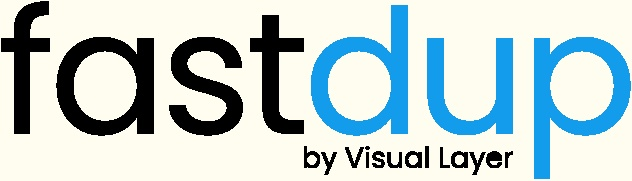
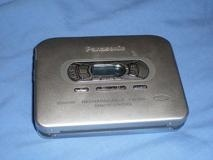
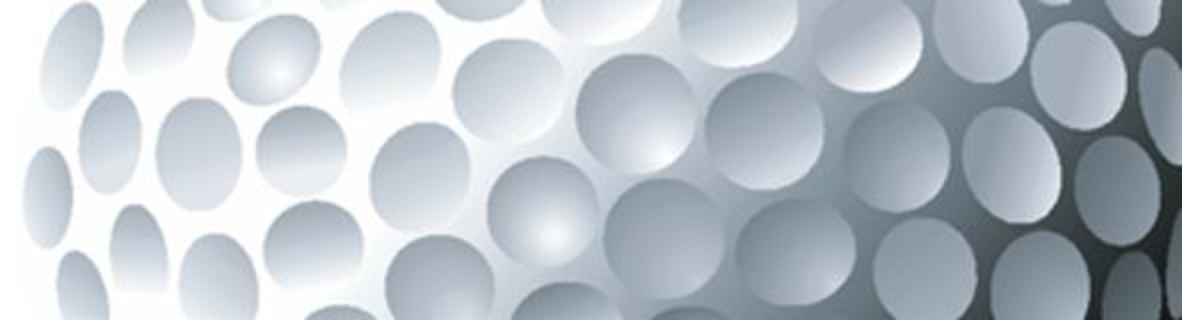
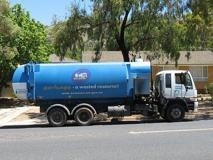
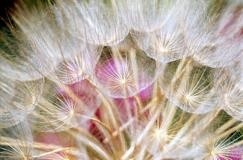
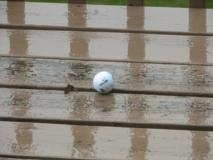
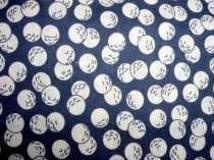
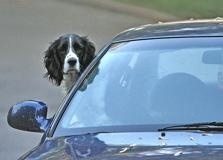
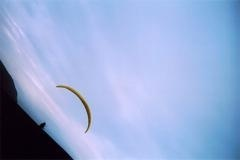
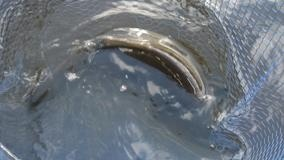
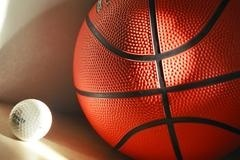
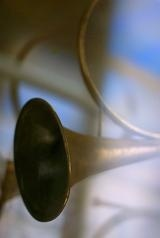
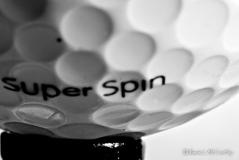
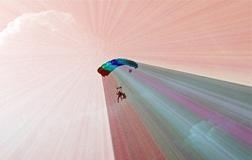
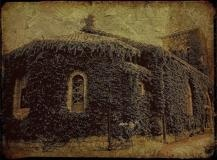
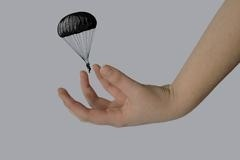
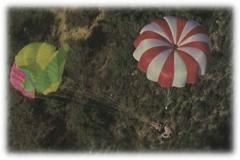
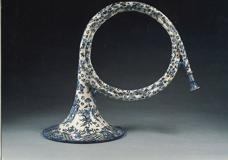
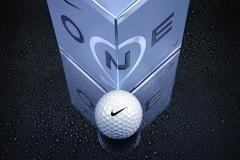
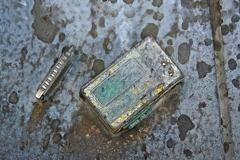
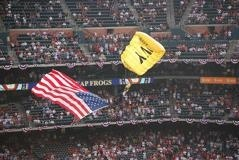

In [10]:
fd.vis.outliers_gallery()

Show outliers image data.

In [11]:
fd.outliers().head(5)

outlier  nearest  distance                                      filename_outlier    label_outlier split_outlier  index_x error_code_outlier  is_valid_outlier  fd_index_outlier                                      filename_nearest     label_nearest split_nearest  index_y error_code_nearest  is_valid_nearest  fd_index_nearest
0     2664     9763  0.476124   imagenette2-160/train/n02979186/n02979186_3967.JPEG  cassette_player         train     2664              VALID              True              2664      imagenette2-160/val/n01440764/n01440764_710.JPEG             tench           val     9763              VALID              True              9763
1     8150     7831  0.514680   imagenette2-160/train/n03445777/n03445777_5218.JPEG        golf_ball         train     8150              VALID              True              8150  imagenette2-160/train/n03445777/n03445777_18756.JPEG         golf_ball         train     7831              VALID              True              7831
2    12076      956  0.539276     imagenette2-160/val/n03417042/n03417042_5301.JPEG    garbage_truck           val    12076              VALID              True             12076   imagenette2-160/train/n01440764/n01440764_9898.JPEG             tench         train      956              VALID              True               956
3     9087     8628  0.544795  imagenette2-160/train/n03888257/n03888257_34639.JPEG        parachute         train     9087              VALID              True              9087  imagenette2-160/train/n03888257/n03888257_12053.JPEG         parachute         train     8628              VALID              True              8628
4     7966     1630  0.555266   imagenette2-160/train/n03445777/n03445777_3254.JPEG        golf_ball         train     7966              VALID              True              7966    imagenette2-160/train/n02102040/n02102040_585.JPEG  English_springer         train     1630              VALID              True              1630

## Comparing Labels of Similar Images
Find possible mislabels by comparing a query image to other images in the dataset.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 106.60it/s]


Stored similar images visual view in  fastdup_imagenette/galleries/similarity.html



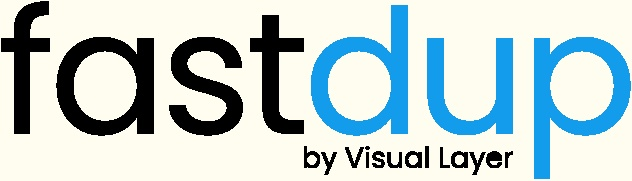
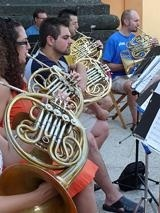
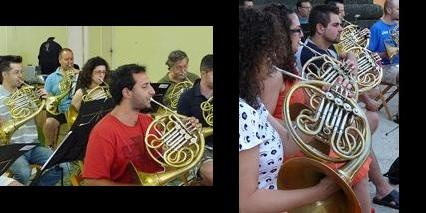
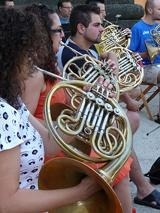
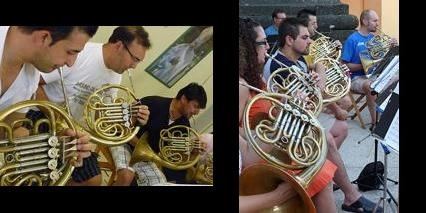
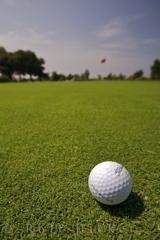
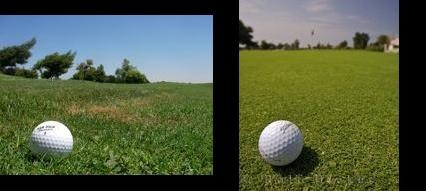
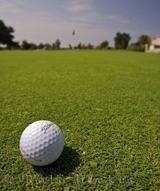
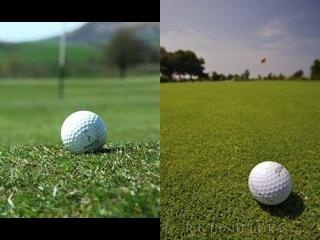
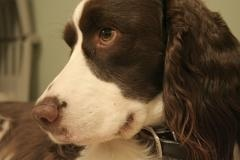
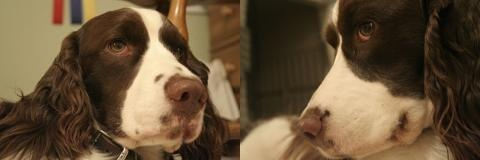
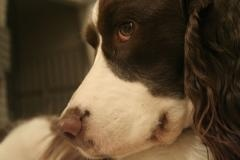
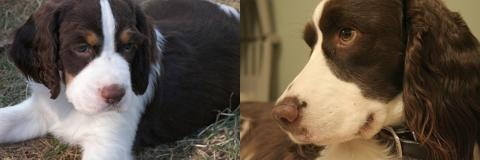
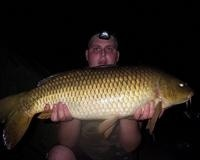
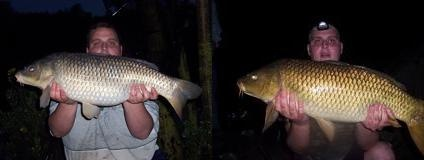
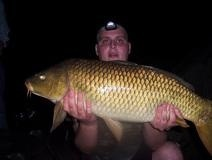
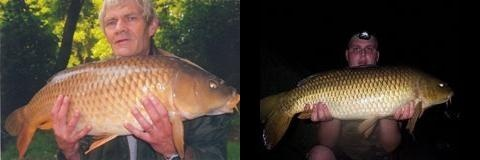
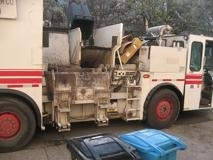
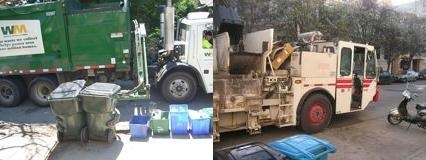
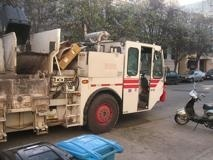
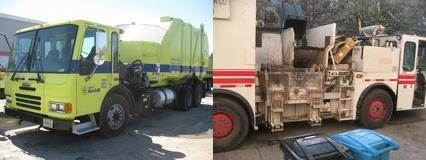
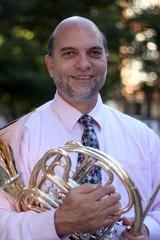
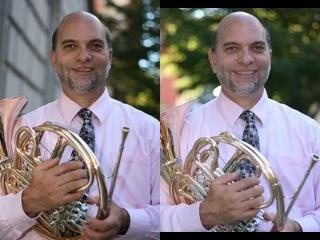
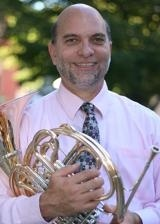
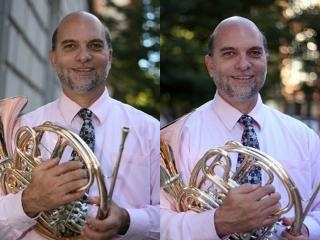
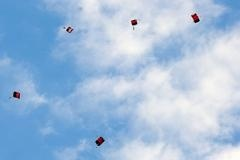
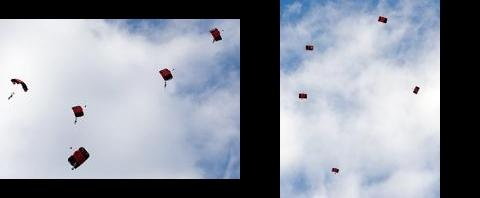
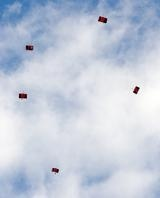
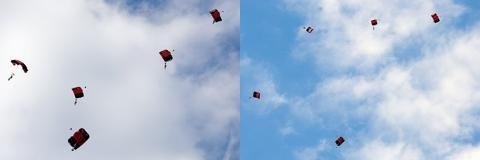
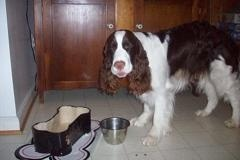
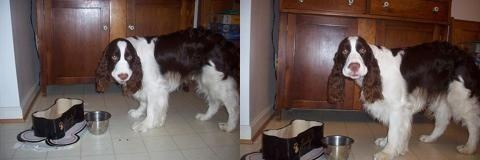
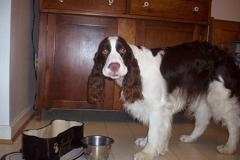
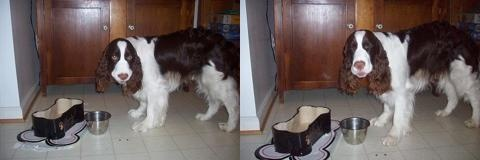
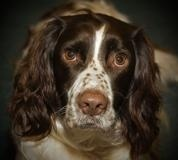
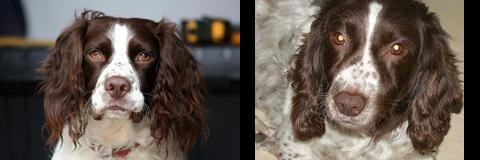
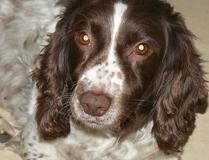
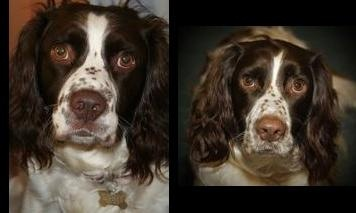
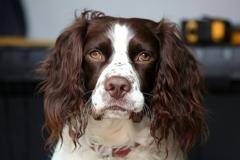
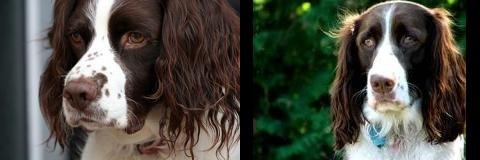
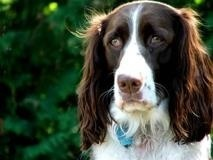
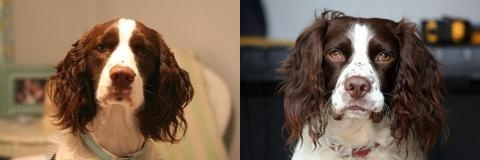

from                                                                                                            to                                 label                                label2              distance
3630  imagenette2-160/train/n03394916/n03394916_44127.JPEG    [imagenette2-160/val/n03394916/n03394916_30631.JPEG, imagenette2-160/train/n03394916/n03394916_36016.JPEG]            [French_horn, French_horn]            [French_horn, French_horn]  [0.968786, 0.918324]
7823    imagenette2-160/val/n03394916/n03394916_30631.JPEG  [imagenette2-160/train/n03394916/n03394916_44127.JPEG, imagenette2-160/train/n03394916/n03394916_29969.JPEG]            [French_horn, French_horn]            [French_horn, French_horn]  [0.968786, 0.903753]
8758     imagenette2-160/val/n03445777/n03445777_6882.JPEG     [imagenette2-160/train/n03445777/n03445777_13918.JPEG, imagenette2-160/val/n03445777/n03445777_5912.JPEG]                [golf_ball, golf_ball]                [golf_ball, golf_ball]  [0.962458, 0.918005]
5363  imagenette2-160/train/n03445777/n03445777_13918.JPEG        [imagenette2-160/val/n03445777/n03445777_6882.JPEG, imagenette2-160/val/n03445777/n03445777_8820.JPEG]                [golf_ball, golf_ball]                [golf_ball, golf_ball]  [0.962458, 0.917039]
896    imagenette2-160/train/n02102040/n02102040_1564.JPEG    [imagenette2-160/train/n02102040/n02102040_3837.JPEG, imagenette2-160/train/n02102040/n02102040_3586.JPEG]  [English_springer, English_springer]  [English_springer, English_springer]  [0.953837, 0.908732]
...                                                    ...                                                                                                           ...                                   ...                                   ...                   ...
6224  imagenette2-160/train/n03888257/n03888257_38633.JPEG                                                        [imagenette2-160/train/n03888257/n03888257_12816.JPEG]                           [parachute]                           [parachute]            [0.800073]
5917  imagenette2-160/train/n03888257/n03888257_12816.JPEG                                                        [imagenette2-160/train/n03888257/n03888257_38633.JPEG]                           [parachute]                           [parachute]            [0.800073]
4324   imagenette2-160/train/n03417042/n03417042_3236.JPEG                                                        [imagenette2-160/train/n03417042/n03417042_12297.JPEG]                       [garbage_truck]                       [garbage_truck]            [0.800025]
3429  imagenette2-160/train/n03394916/n03394916_32478.JPEG                                                        [imagenette2-160/train/n03394916/n03394916_35573.JPEG]                         [French_horn]                         [French_horn]            [0.800012]
7503    imagenette2-160/val/n03028079/n03028079_13002.JPEG                                                         [imagenette2-160/train/n03028079/n03028079_3839.JPEG]                              [church]                              [church]            [0.800002]

[9064 rows x 5 columns]

In [12]:
fd.vis.similarity_gallery() 

## Similar Image Pairs

Find similar image pairs within and across the train and validation subfolders. Pairs may include train-train, train-val, val-train, and val-val.

/apps/volume/dataset-volume/mambaforge/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
/apps/volume/dataset-volume/mambaforge/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
100%|███████████████████████████████████████████

Stored similarity visual view in  fastdup_imagenette/galleries/duplicates.html



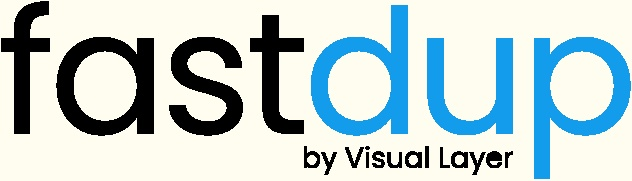
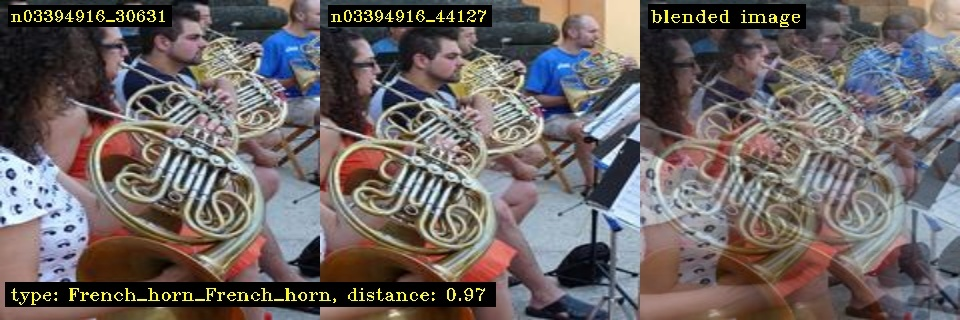
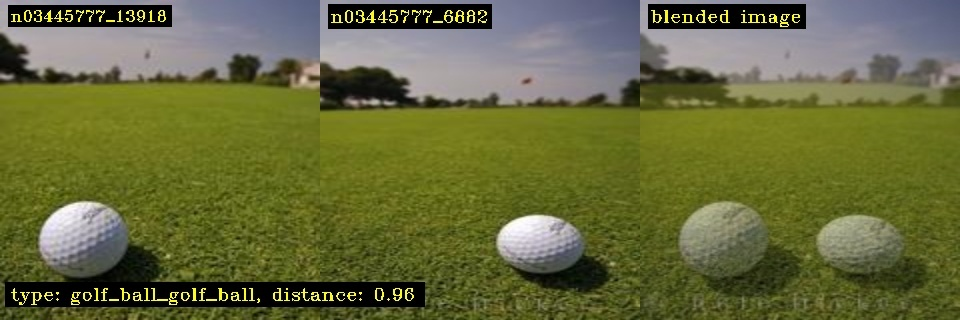
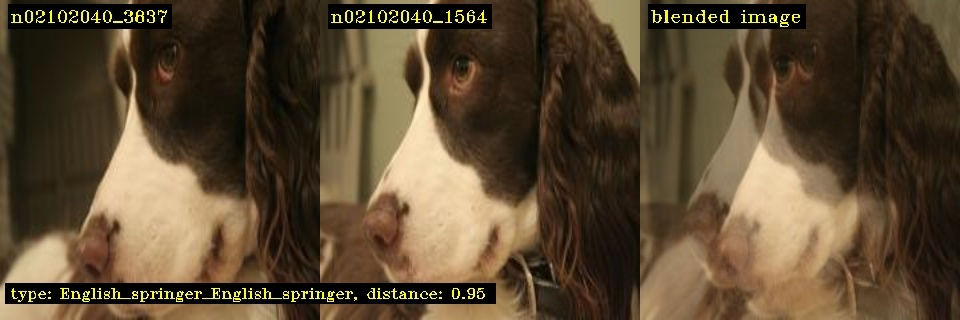
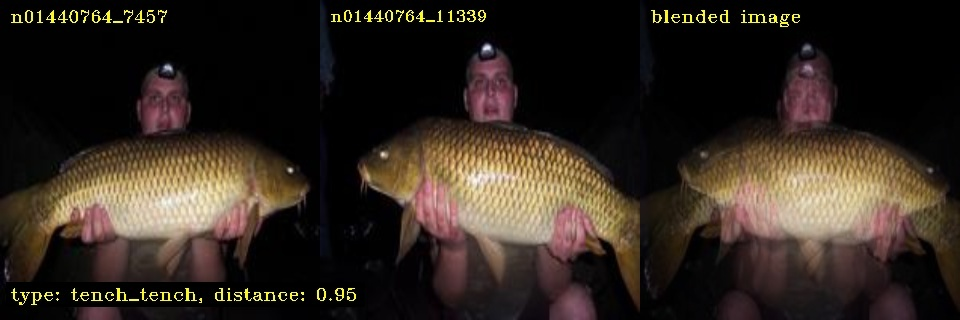
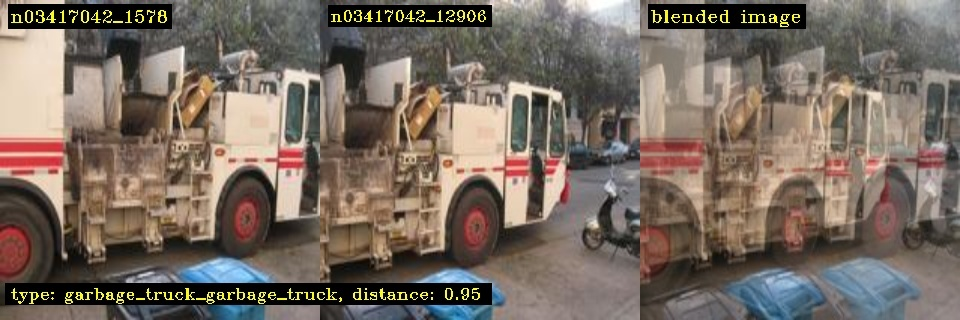
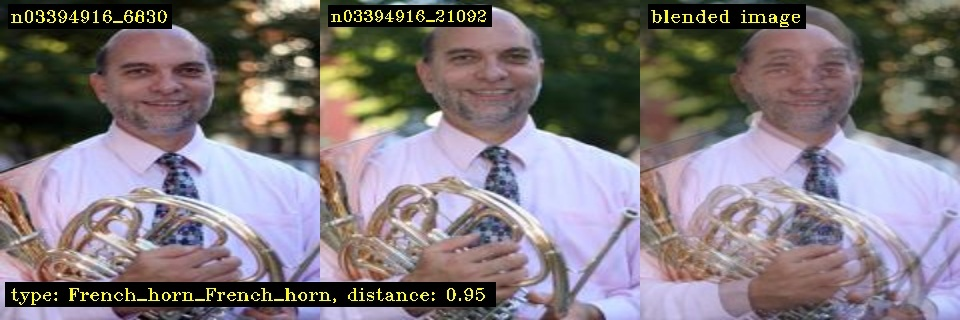
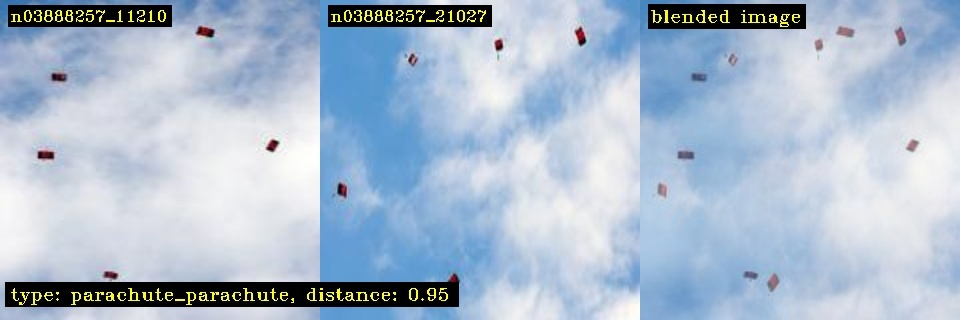
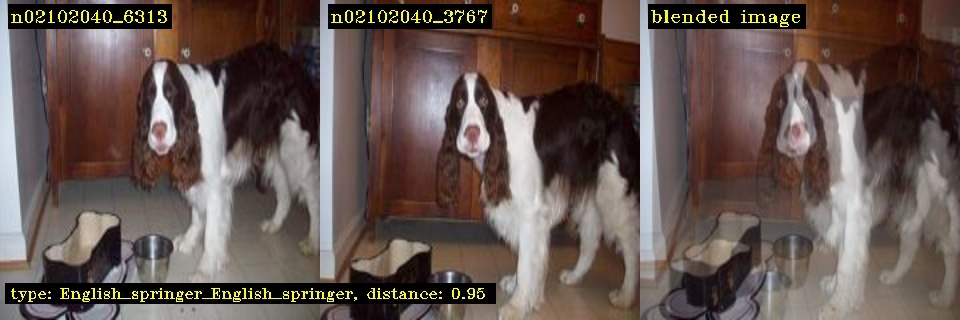
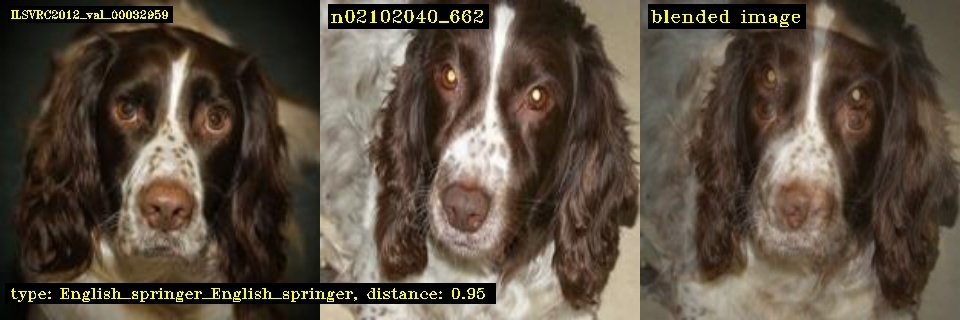
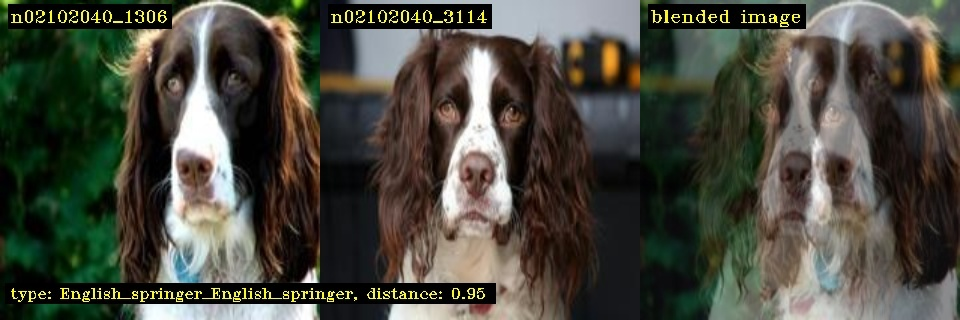

In [13]:
fd.vis.duplicates_gallery()

Show similar image pairs.

In [14]:
fd.similarity().head(5)

from     to  distance                                         filename_from        label_from split_from  index_x error_code_from  is_valid_from  fd_index_from                                           filename_to          label_to split_to  index_y error_code_to  is_valid_to  fd_index_to
0  11521   5390  0.968786    imagenette2-160/val/n03394916/n03394916_30631.JPEG       French_horn        val    11521           VALID           True          11521  imagenette2-160/train/n03394916/n03394916_44127.JPEG       French_horn    train     5390         VALID         True         5390
1   5390  11521  0.968786  imagenette2-160/train/n03394916/n03394916_44127.JPEG       French_horn      train     5390           VALID           True           5390    imagenette2-160/val/n03394916/n03394916_30631.JPEG       French_horn      val    11521         VALID         True        11521
2  12914   7715  0.962458     imagenette2-160/val/n03445777/n03445777_6882.JPEG         golf_ball        val    12914           VALID           True          12914  imagenette2-160/train/n03445777/n03445777_13918.JPEG         golf_ball    train     7715         VALID         True         7715
3   7715  12914  0.962458  imagenette2-160/train/n03445777/n03445777_13918.JPEG         golf_ball      train     7715           VALID           True           7715     imagenette2-160/val/n03445777/n03445777_6882.JPEG         golf_ball      val    12914         VALID         True        12914
4   1404   1117  0.953837   imagenette2-160/train/n02102040/n02102040_3837.JPEG  English_springer      train     1404           VALID           True           1404   imagenette2-160/train/n02102040/n02102040_1564.JPEG  English_springer    train     1117         VALID         True         1117

## Image Clusters

tench


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 36.72it/s]


Finished OK. Components are stored as image files fastdup_imagenette/galleries/components_[index].jpg
Stored components visual view in  fastdup_imagenette/galleries/components.html
Execution time in seconds 3.0



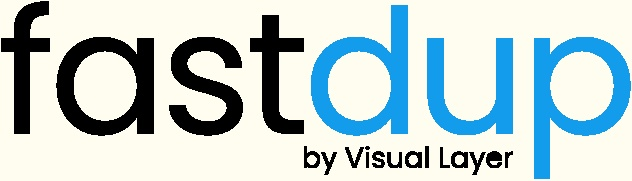
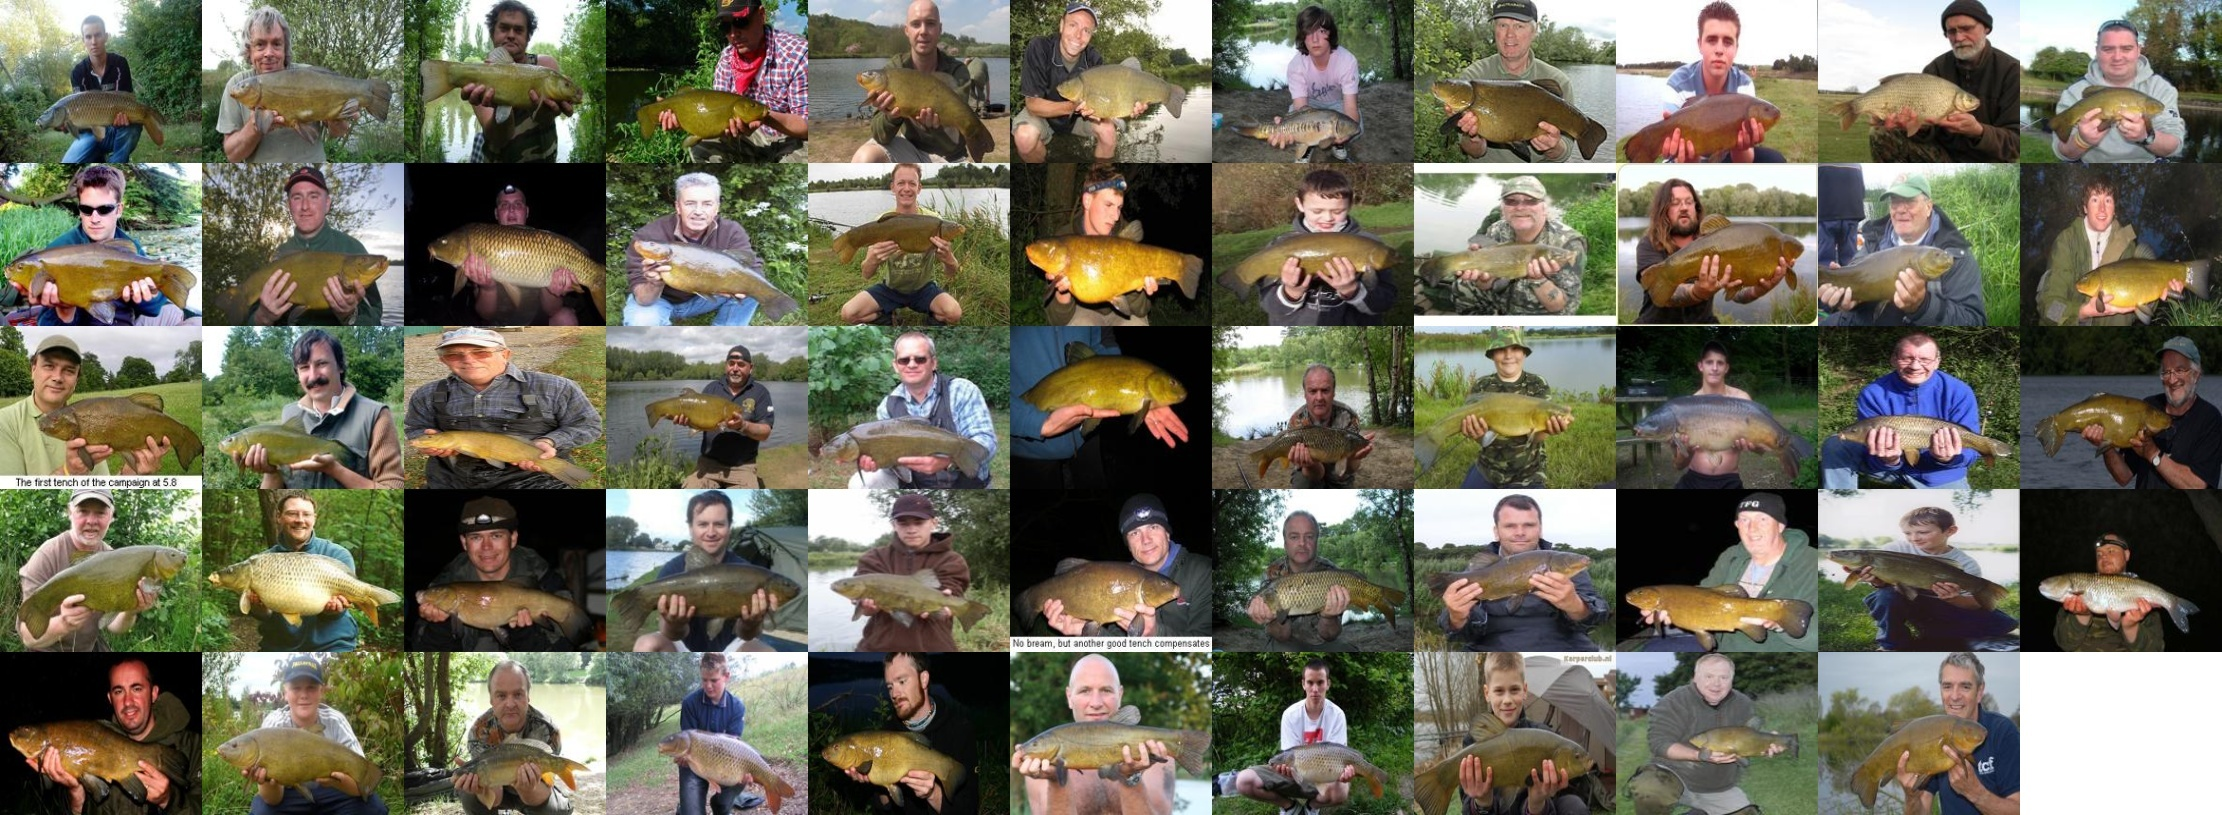
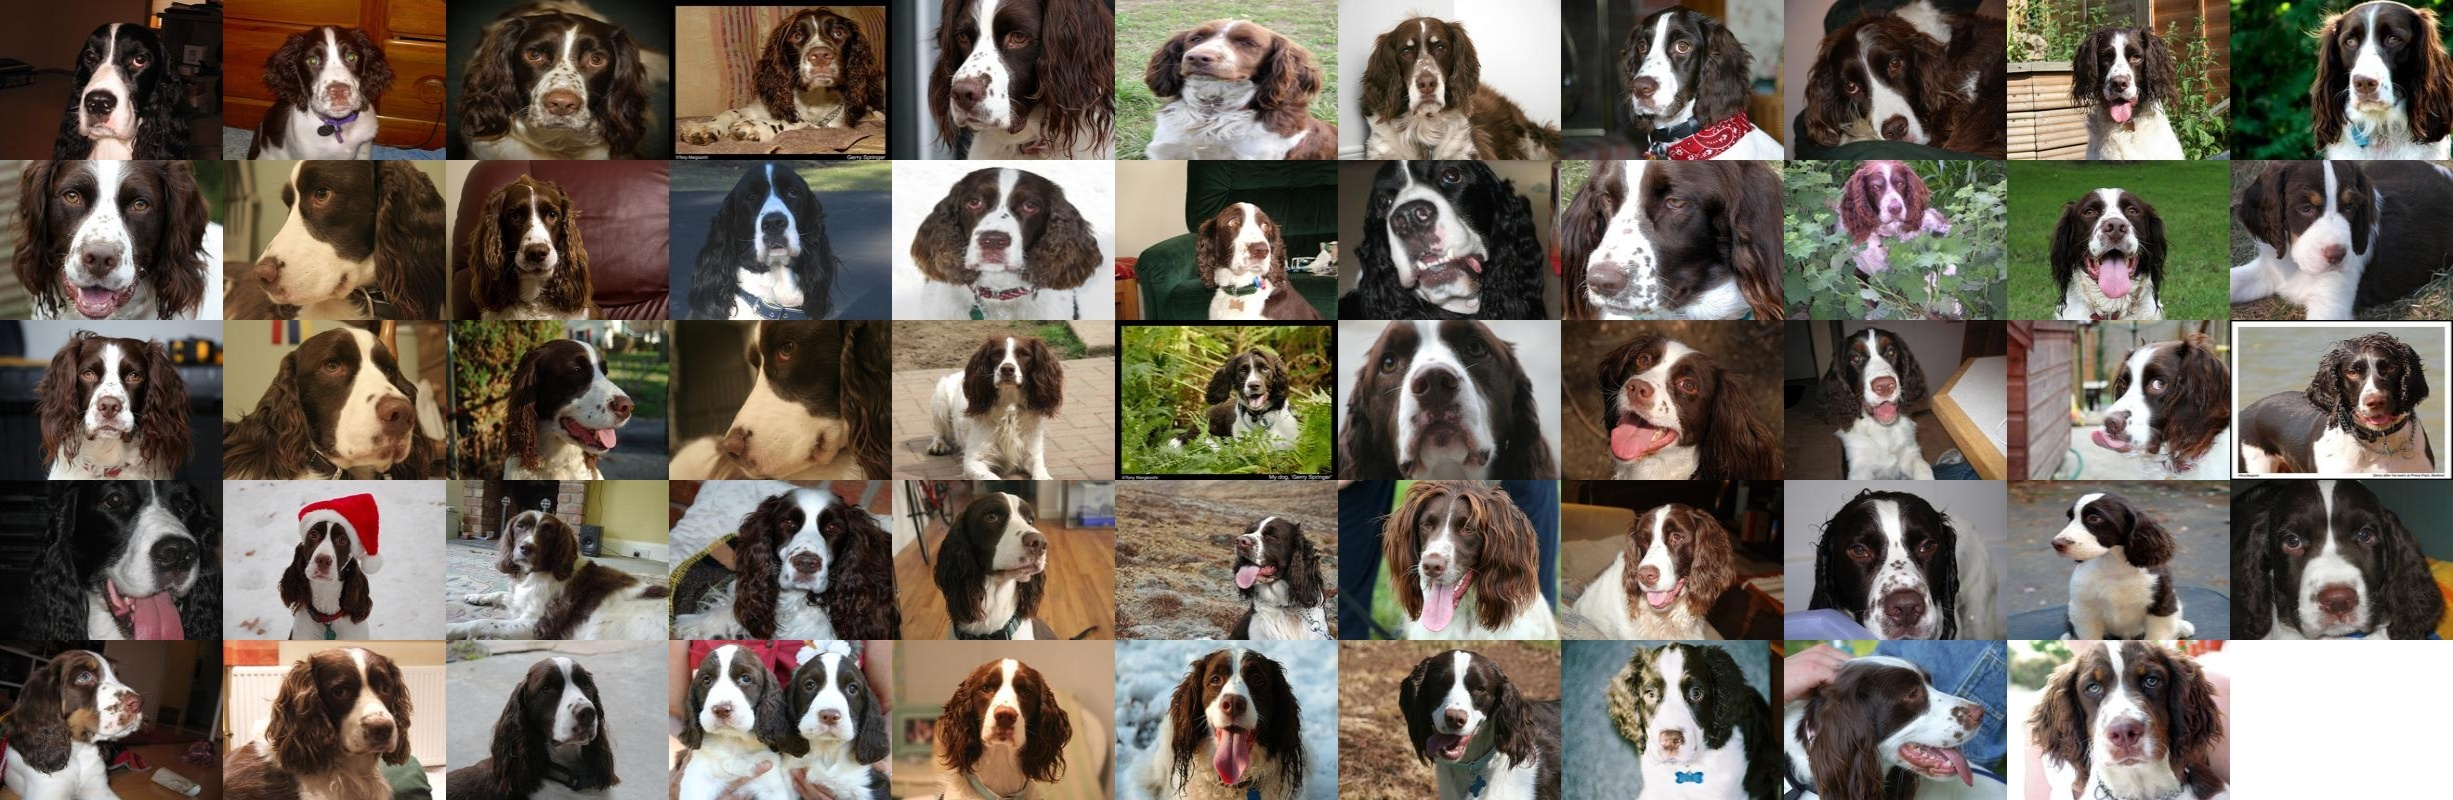
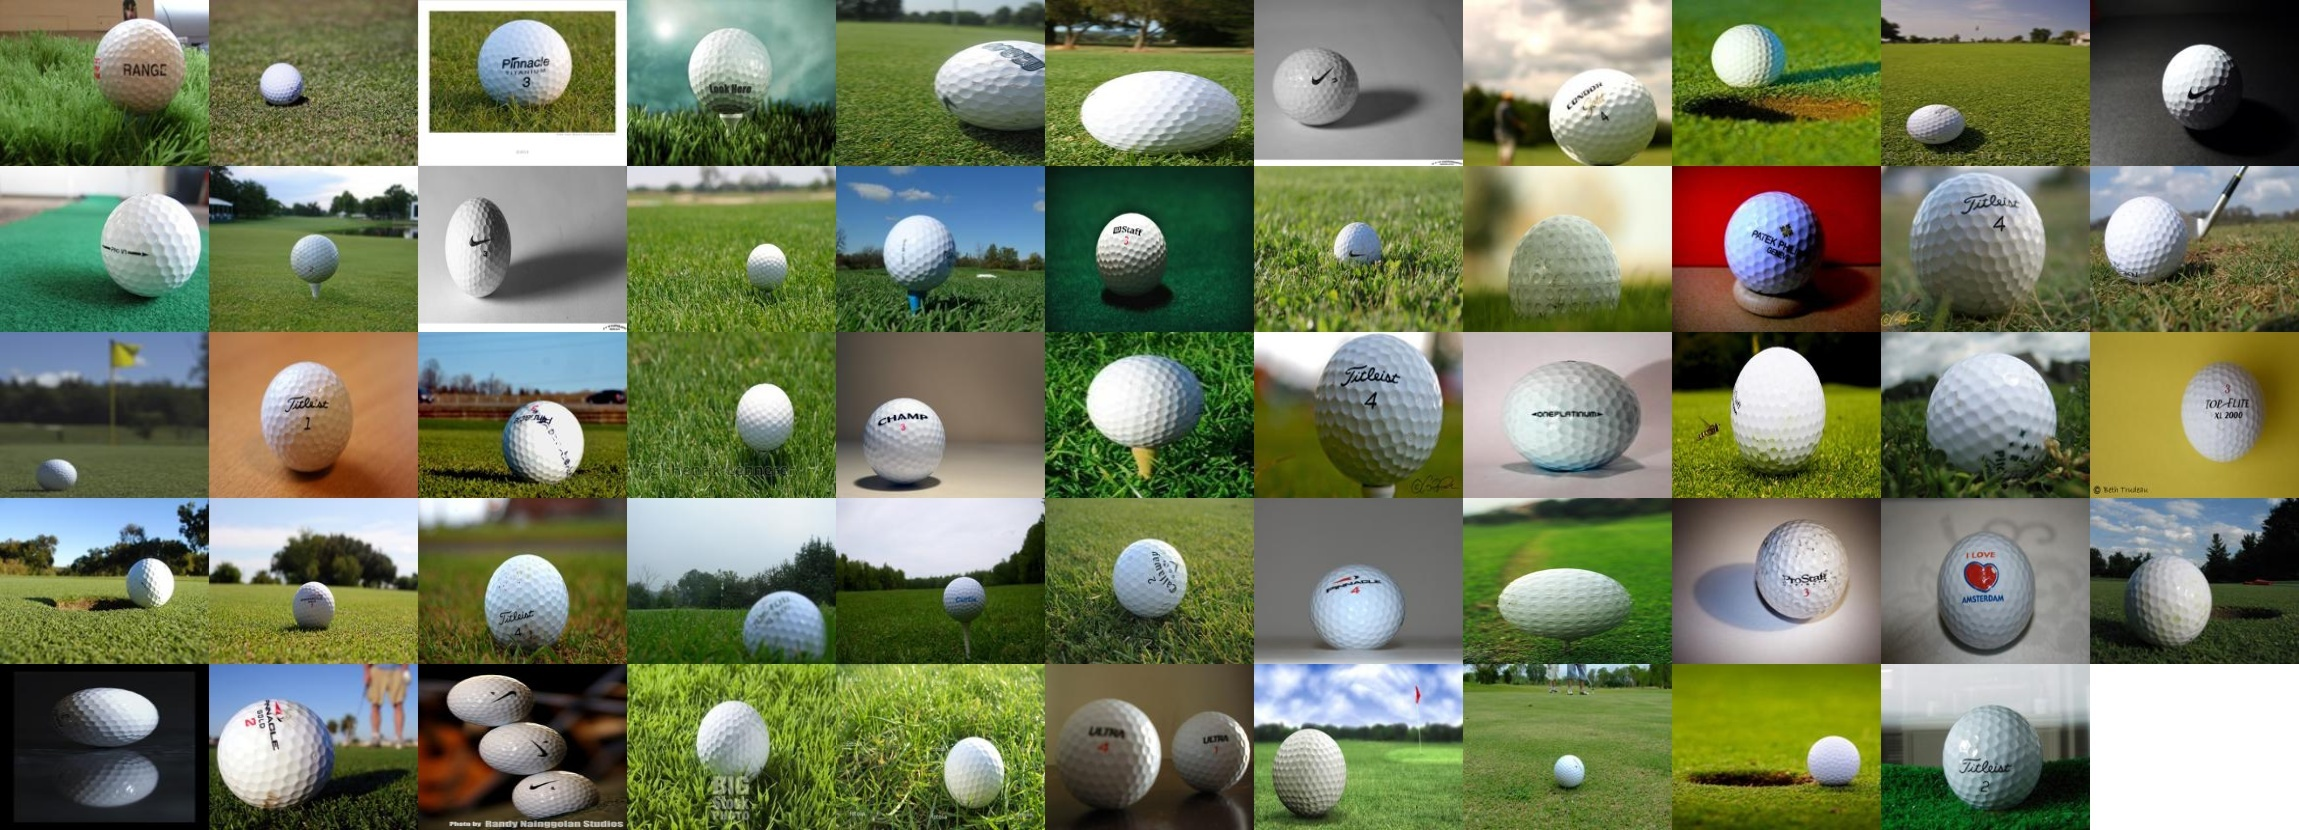
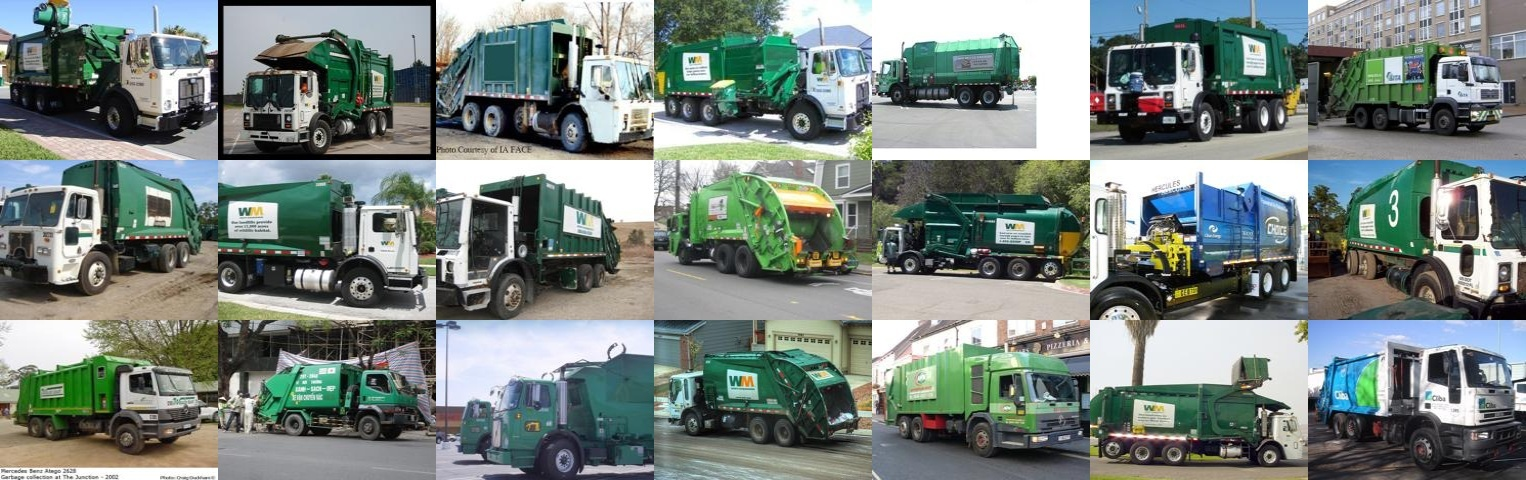
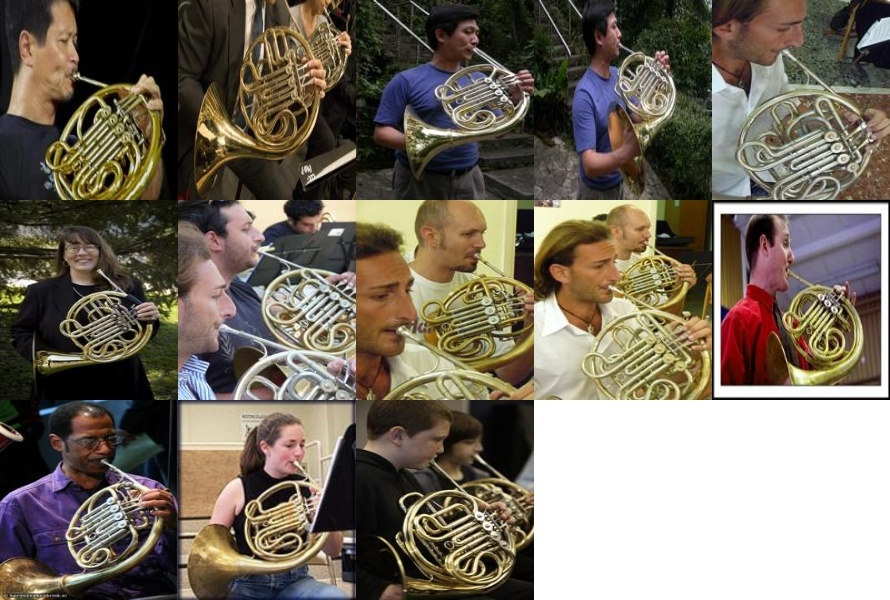
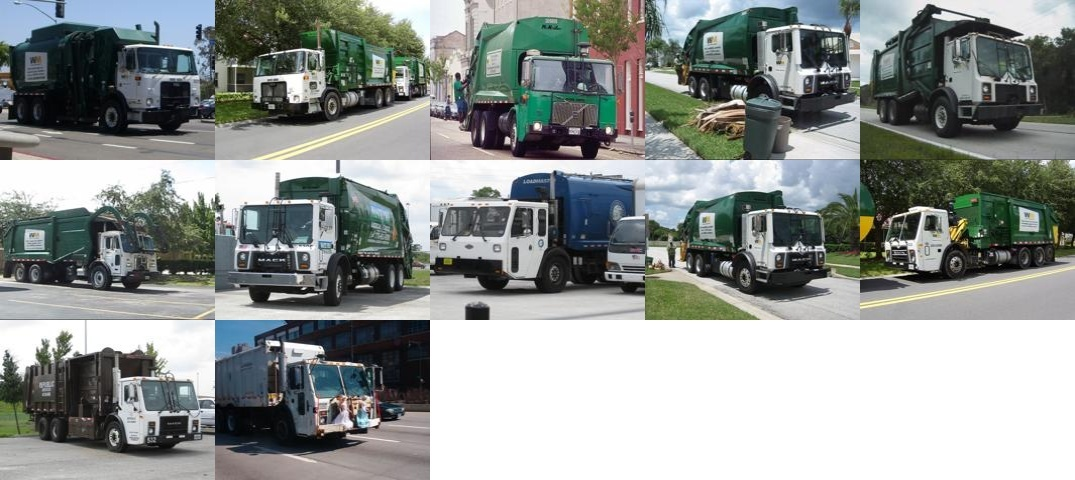
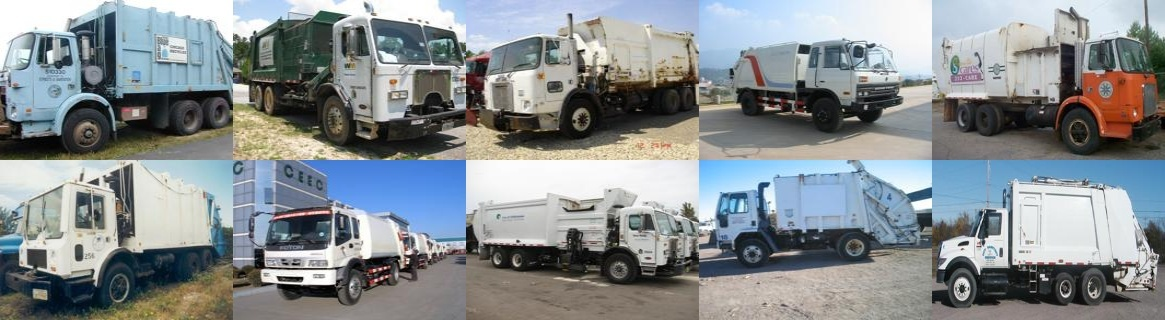
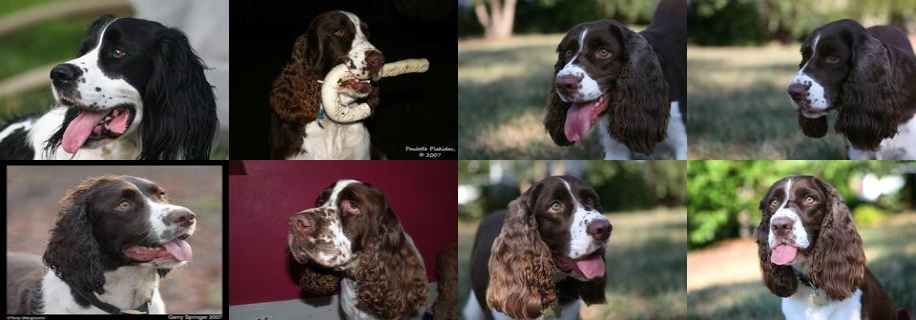
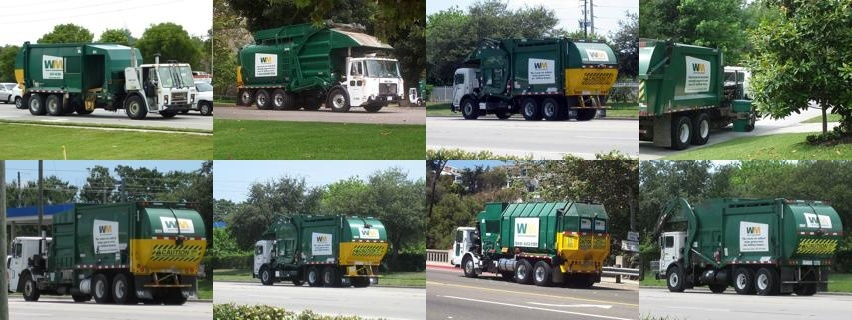
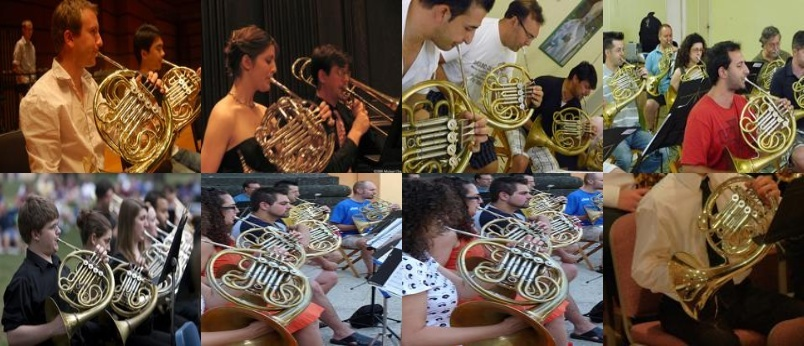
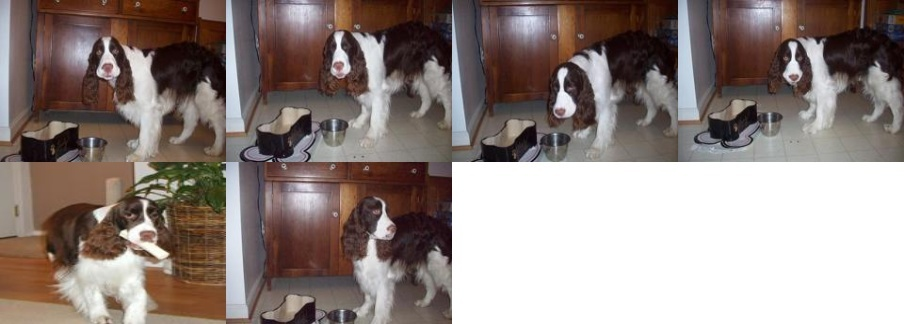
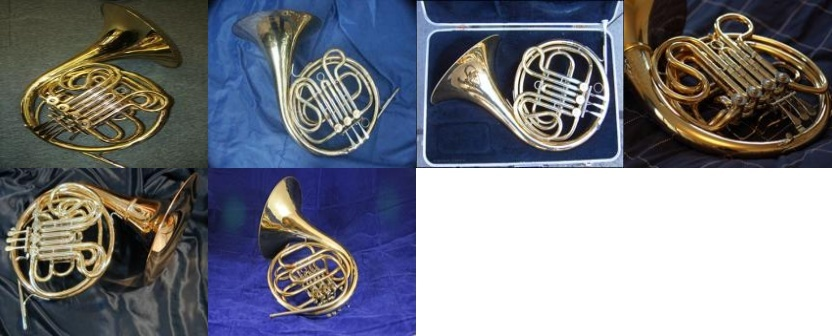
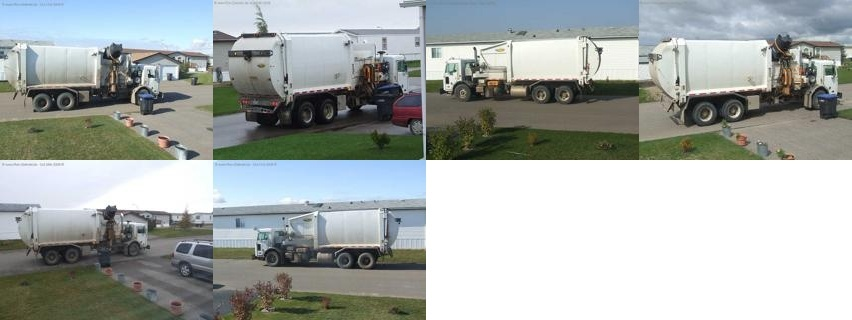
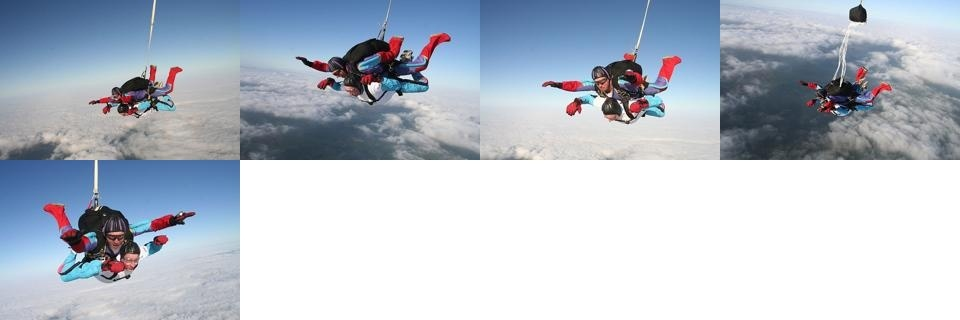
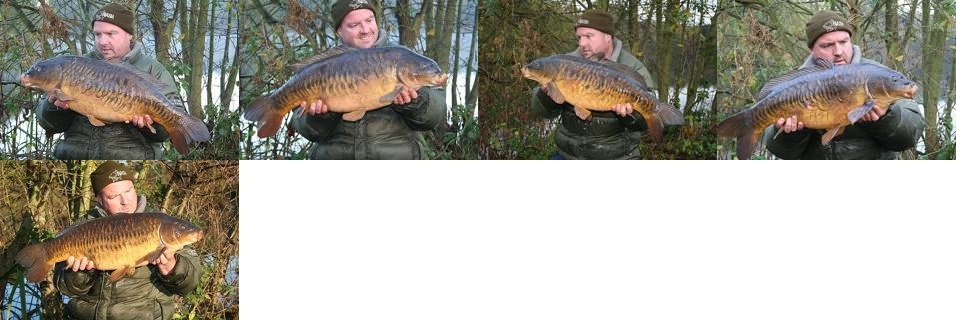
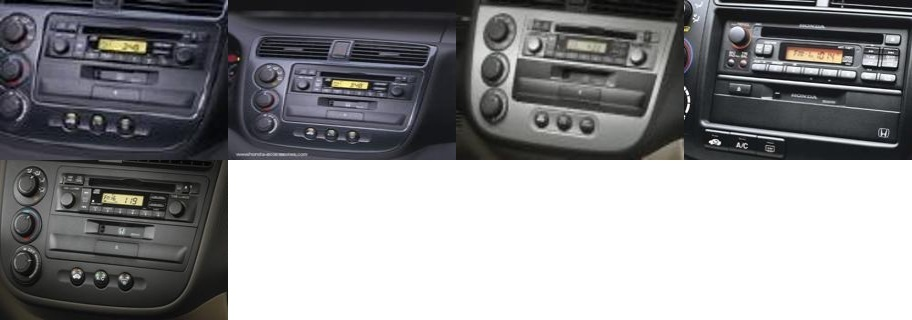
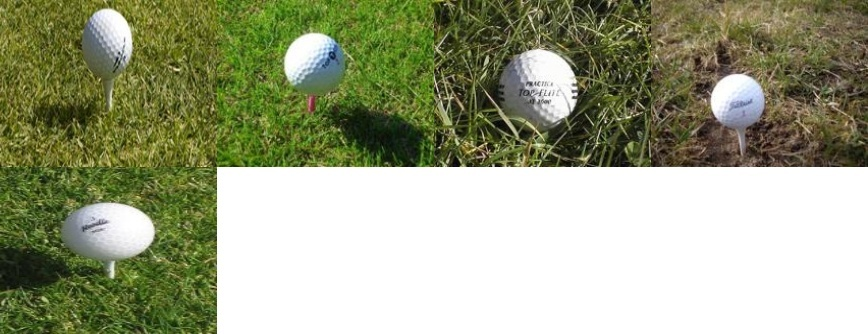
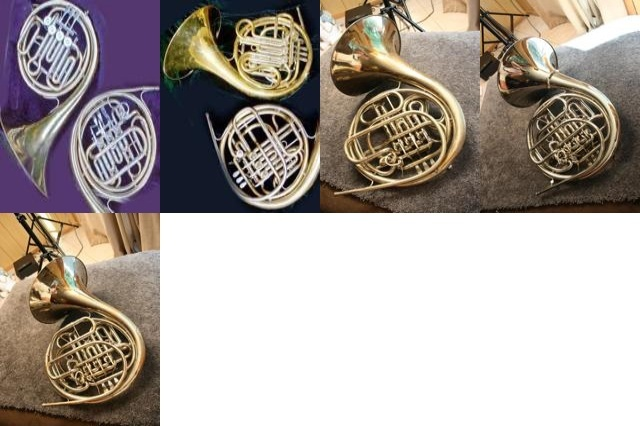
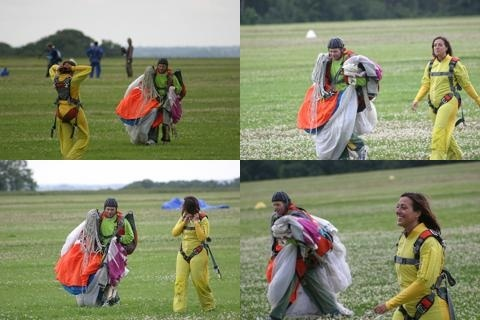
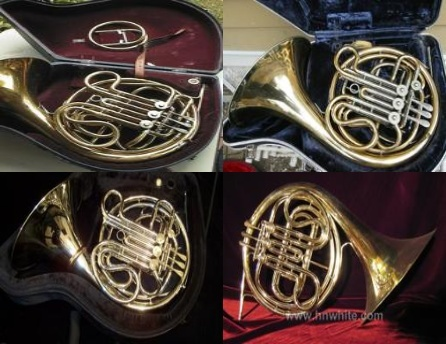

In [15]:
fd.vis.component_gallery()

You can also visualize clusters with specific labels using the `slice` parameter. For example let's visualize clusters with the `chain_saw` label

chain_saw


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 250.94it/s]

Finished OK. Components are stored as image files fastdup_imagenette/galleries/components_[index].jpg
Stored components visual view in  fastdup_imagenette/galleries/components.html
Execution time in seconds 0.3



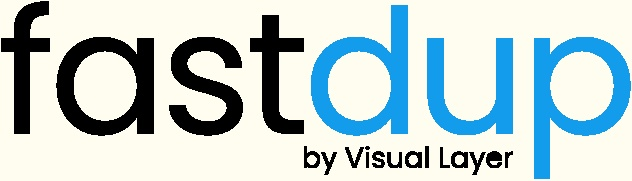
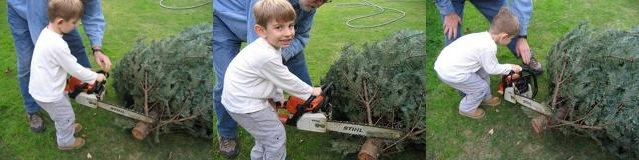
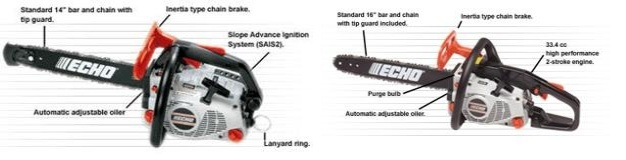
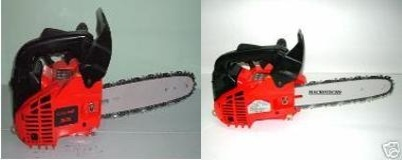
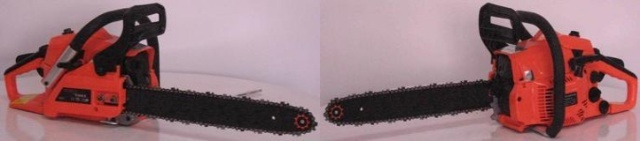
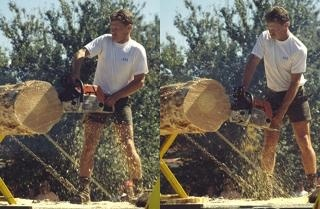
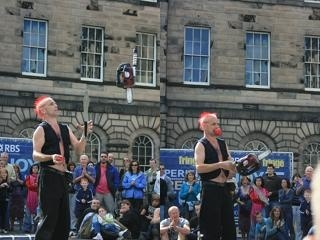
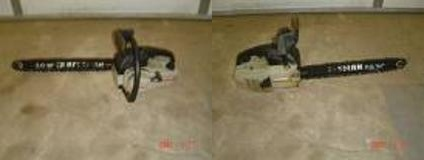
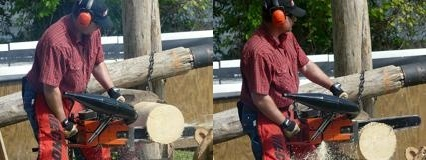
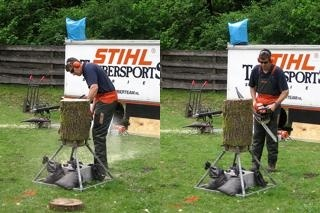
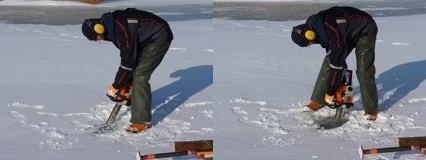
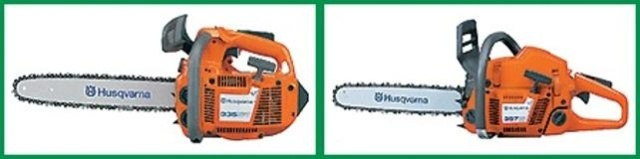

In [16]:
fd.vis.component_gallery(slice='chain_saw')

## Connected Components

In [17]:
cc_df, _ = fd.connected_components()
cc_df.sort_values('count', ascending=False).head(5)

index  component_id       sum  count  mean_distance  min_distance  max_distance                                              filename  label  split error_code  is_valid  fd_index
235    235             6  517.2897  566.0         0.9139        0.9001        0.9534  imagenette2-160/train/n01440764/n01440764_13304.JPEG  tench  train      VALID      True       235
121    121             6  517.2897  566.0         0.9139        0.9001        0.9534  imagenette2-160/train/n01440764/n01440764_11486.JPEG  tench  train      VALID      True       121
685    685             6  517.2897  566.0         0.9139        0.9001        0.9534   imagenette2-160/train/n01440764/n01440764_6174.JPEG  tench  train      VALID      True       685
689    689             6  517.2897  566.0         0.9139        0.9001        0.9534   imagenette2-160/train/n01440764/n01440764_6249.JPEG  tench  train      VALID      True       689
706    706             6  517.2897  566.0         0.9139        0.9001        0.9534   imagenette2-160/train/n01440764/n01440764_6494.JPEG  tench  train      VALID      True       706

We can also get metadata for individual images using their `fastdup_id` available in `fd.annotations()`

In [18]:
fd[349]

{'filename': 'imagenette2-160/train/n01440764/n01440764_1778.JPEG',
 'label': 'tench',
 'split': 'train',
 'index': 349,
 'error_code': 'VALID',
 'is_valid': True,
 'fd_index': 349}